# Repro old results: No site rates in method nor in simulation

In [1]:
%%time
from src.pipeline import Pipeline
from src.end_to_end_simulation import EndToEndSimulator
from collections import defaultdict

experiment_rootdir = "cache_LG"

def run_experiment_and_return_learned_rate_matrices():
    learned_rate_matrices = defaultdict(dict)
    num_transitions = defaultdict(dict)
    for max_families in max_families_list:
        pipeline = Pipeline(
            outdir=f"{experiment_rootdir}/pipeline",
            max_seqs=100000,
            max_sites=100000,
            armstrong_cutoff=None,
            rate_matrix='input_data/synthetic_rate_matrices/WAG_FastTree.txt',
            n_process=32,
            expected_number_of_MSAs=3912,
            max_families=max_families,
            a3m_dir='input_data/LG_Train_a3m',
            pdb_dir=None,
            use_cached=True,
            num_epochs=200,
            device='cpu',
            center=0.06,
            step_size=0.1,
            n_steps=50,
            keep_outliers=False,
            max_height=1000.0,
            max_path_height=1000,
            precomputed_contact_dir=None,
            precomputed_tree_dir=None,
            precomputed_maximum_parsimony_dir=None,
            edge_or_cherry="cherry",
            init_jtt_ipw=True,
            method=["MLE"],
            xrate_grammar=None,
            fast_tree_cats=4,
            use_site_specific_rates=False,
        )
        pipeline.run()
        learned_rate_matrices['real_data'][max_families] = pipeline.get_learned_Q1()
        num_transitions['real_data'][max_families] = pipeline.get_number_of_single_site_transitions()

        end_to_end_simulator = EndToEndSimulator(
            outdir=f"{experiment_rootdir}/end_to_end_simulator",
            pipeline=pipeline,
            simulation_pct_interacting_positions=0.0,
            use_site_specific_rates_in_simulation=False,
            Q1_ground_truth="input_data/synthetic_rate_matrices/WAG_matrix.txt",
            Q2_ground_truth="input_data/synthetic_rate_matrices/Q2_uniform_constrained.txt",
            fast_tree_rate_matrix='input_data/synthetic_rate_matrices/WAG_FastTree.txt',
            fast_tree_cats=4,
            use_site_specific_rates=False,
            simulate_end_to_end=True,
            simulate_from_trees_wo_ancestral_states=True,
            simulate_from_trees_w_ancestral_states=True,
            use_cached=True,
        )
        end_to_end_simulator.run()
        learned_rate_matrices['w_ancestral_states'][max_families] = end_to_end_simulator.pipeline_on_simulated_data_from_trees_w_ancestral_states.get_learned_Q1()
        learned_rate_matrices['wo_ancestral_states'][max_families] = end_to_end_simulator.pipeline_on_simulated_data_from_trees_wo_ancestral_states.get_learned_Q1()
        learned_rate_matrices['end_to_end'][max_families] = end_to_end_simulator.pipeline_on_simulated_data_end_to_end.get_learned_Q1()
    return learned_rate_matrices, num_transitions
max_families_list = [3912]
learned_rate_matrices_orig, num_transitions_orig = run_experiment_and_return_learned_rate_matrices()

100%|██████████| 3912/3912 [00:00<00:00, 12465.44it/s]

CPU times: user 6.54 s, sys: 10.6 s, total: 17.1 s
Wall time: 11.8 s


# Break old method: no site rates in method, yes in simulations

# Only caveat is that because we use site-specific rates in simulation, only 1024 sites will be used per family, making the simulated data potentially smaller for families larger that 1024. But I expect deteriorated performance to be due to not accounting for site rates

In [2]:
%%time
from src.pipeline import Pipeline
from src.end_to_end_simulation import EndToEndSimulator
from collections import defaultdict

experiment_rootdir = "cache_LG"

def run_experiment_and_return_learned_rate_matrices():
    learned_rate_matrices = defaultdict(dict)
    num_transitions = defaultdict(dict)
    for max_families in max_families_list:
        pipeline = Pipeline(
            outdir=f"{experiment_rootdir}/pipeline",
            max_seqs=100000,
            max_sites=100000,
            armstrong_cutoff=None,
            rate_matrix='input_data/synthetic_rate_matrices/WAG_FastTree.txt',
            n_process=32,
            expected_number_of_MSAs=3912,
            max_families=max_families,
            a3m_dir='input_data/LG_Train_a3m',
            pdb_dir=None,
            use_cached=True,
            num_epochs=200,
            device='cpu',
            center=0.06,
            step_size=0.1,
            n_steps=50,
            keep_outliers=False,
            max_height=1000.0,
            max_path_height=1000,
            precomputed_contact_dir=None,
            precomputed_tree_dir=None,
            precomputed_maximum_parsimony_dir=None,
            edge_or_cherry="cherry",
            init_jtt_ipw=True,
            method=["MLE"],
            xrate_grammar=None,
            fast_tree_cats=4,
            use_site_specific_rates=False,
        )
        pipeline.run()
        learned_rate_matrices['real_data'][max_families] = pipeline.get_learned_Q1()
        num_transitions['real_data'][max_families] = pipeline.get_number_of_single_site_transitions()

        end_to_end_simulator = EndToEndSimulator(
            outdir=f"{experiment_rootdir}/end_to_end_simulator",
            pipeline=pipeline,
            simulation_pct_interacting_positions=0.0,
            use_site_specific_rates_in_simulation=True,  # False, <== Only this chages! (The simulation)
            Q1_ground_truth="input_data/synthetic_rate_matrices/WAG_matrix.txt",
            Q2_ground_truth="input_data/synthetic_rate_matrices/Q2_uniform_constrained.txt",
            fast_tree_rate_matrix='input_data/synthetic_rate_matrices/WAG_FastTree.txt',
            fast_tree_cats=4,
            use_site_specific_rates=False,
            simulate_end_to_end=True,
            simulate_from_trees_wo_ancestral_states=True,
            simulate_from_trees_w_ancestral_states=True,
            use_cached=True,
        )
        end_to_end_simulator.run()
        learned_rate_matrices['w_ancestral_states'][max_families] = end_to_end_simulator.pipeline_on_simulated_data_from_trees_w_ancestral_states.get_learned_Q1()
        learned_rate_matrices['wo_ancestral_states'][max_families] = end_to_end_simulator.pipeline_on_simulated_data_from_trees_wo_ancestral_states.get_learned_Q1()
        learned_rate_matrices['end_to_end'][max_families] = end_to_end_simulator.pipeline_on_simulated_data_end_to_end.get_learned_Q1()
    return learned_rate_matrices, num_transitions
max_families_list = [3912]
learned_rate_matrices_orig_break, num_transitions_orig_break = run_experiment_and_return_learned_rate_matrices()

100%|██████████| 3912/3912 [00:00<00:00, 10615.81it/s]


CPU times: user 3.67 s, sys: 7.16 s, total: 10.8 s
Wall time: 9.91 s


# Now fix the method by taking into account site rate variation

In [3]:
%%time
from src.pipeline import Pipeline
from src.end_to_end_simulation import EndToEndSimulator
from collections import defaultdict

experiment_rootdir = "cache_LG"

def run_experiment_and_return_learned_rate_matrices():
    learned_rate_matrices = defaultdict(dict)
    num_transitions = defaultdict(dict)
    for max_families in max_families_list:
        pipeline = Pipeline(
            outdir=f"{experiment_rootdir}/pipeline",
            max_seqs=100000,
            max_sites=100000,
            armstrong_cutoff=None,
            rate_matrix='input_data/synthetic_rate_matrices/WAG_FastTree.txt',
            n_process=32,
            expected_number_of_MSAs=3912,
            max_families=max_families,
            a3m_dir='input_data/LG_Train_a3m',
            pdb_dir=None,
            use_cached=True,
            num_epochs=200,
            device='cpu',
            center=0.06,
            step_size=0.1,
            n_steps=50,
            keep_outliers=False,
            max_height=1000.0,
            max_path_height=1000,
            precomputed_contact_dir=None,
            precomputed_tree_dir=None,
            precomputed_maximum_parsimony_dir=None,
            edge_or_cherry="cherry",
            init_jtt_ipw=True,
            method=["MLE"],
            xrate_grammar=None,
            fast_tree_cats=4,
            use_site_specific_rates=True,  # False, <== This should fix it!
        )
        pipeline.run()
        learned_rate_matrices['real_data'][max_families] = pipeline.get_learned_Q1()
        num_transitions['real_data'][max_families] = pipeline.get_number_of_single_site_transitions()

        end_to_end_simulator = EndToEndSimulator(
            outdir=f"{experiment_rootdir}/end_to_end_simulator",
            pipeline=pipeline,
            simulation_pct_interacting_positions=0.0,
            use_site_specific_rates_in_simulation=True,  # False, <== Only this chages! (The simulation)
            Q1_ground_truth="input_data/synthetic_rate_matrices/WAG_matrix.txt",
            Q2_ground_truth="input_data/synthetic_rate_matrices/Q2_uniform_constrained.txt",
            fast_tree_rate_matrix='input_data/synthetic_rate_matrices/WAG_FastTree.txt',
            fast_tree_cats=4,
            use_site_specific_rates=True,  # False, <== This should fix it!
            simulate_end_to_end=True,
            simulate_from_trees_wo_ancestral_states=True,
            simulate_from_trees_w_ancestral_states=True,
            use_cached=True,
        )
        end_to_end_simulator.run()
        learned_rate_matrices['w_ancestral_states'][max_families] = end_to_end_simulator.pipeline_on_simulated_data_from_trees_w_ancestral_states.get_learned_Q1()
        learned_rate_matrices['wo_ancestral_states'][max_families] = end_to_end_simulator.pipeline_on_simulated_data_from_trees_wo_ancestral_states.get_learned_Q1()
        learned_rate_matrices['end_to_end'][max_families] = end_to_end_simulator.pipeline_on_simulated_data_end_to_end.get_learned_Q1()
    return learned_rate_matrices, num_transitions
max_families_list = [3912]
learned_rate_matrices_orig_fixed, num_transitions_orig_fixed = run_experiment_and_return_learned_rate_matrices()

100%|██████████| 3912/3912 [00:00<00:00, 10043.43it/s]


CPU times: user 3.64 s, sys: 7.11 s, total: 10.7 s
Wall time: 9.83 s


# Analysis code

***** Original *****
*************** #families = 3912 ***************


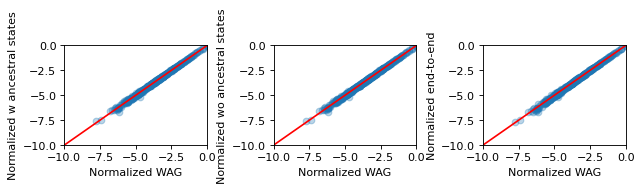

***** Original Break *****
*************** #families = 3912 ***************


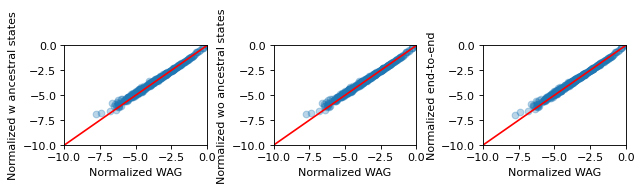

***** Original Fixed *****
*************** #families = 3912 ***************


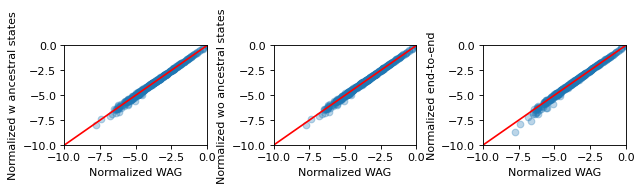

In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import Phylo_util
import numpy as np
import pandas as pd
SRC_DIR = "./"

def normalized(Q):
    pi = Phylo_util.solve_stationery_dist(Q)
    mutation_rate = pi @ -np.diag(Q)
    return Q / mutation_rate

def log_log_plot(Q_true, Q_true_name, Q_pred, Q_pred_name, normalize=False):
    if normalize:
        plt.scatter(np.log(np.abs(normalized(Q_true))), np.log(np.abs(normalized(Q_pred))), alpha=0.3)
        plt.xlabel(f'Normalized {Q_true_name}')
        plt.ylabel(f'Normalized {Q_pred_name}')
    else:
        plt.scatter(np.log(np.abs(Q_true)), np.log(np.abs(Q_pred)), alpha=0.3)
        plt.xlabel(f'{Q_true_name}')
        plt.ylabel(f'{Q_pred_name}')
    plt.xlim([-10, 0])
    plt.ylim([-10, 0])
    plt.plot([-10, 0], [-10, 0], color='r')

def plot_convergence_to_WAG_for_simulated_data(learned_rate_matrices):
    # For the simulated data, plot the ground truth (WAG) against the estimates.
    WAG_matrix = np.array(pd.read_csv(f"{SRC_DIR}input_data/synthetic_rate_matrices/WAG_matrix.txt", sep="\t", index_col=0))
    for max_families in max_families_list:
        print("*" * 15 + f" #families = {max_families} " + "*" * 15)
        for normalize in [True]:
            figure(figsize=(8, 2), dpi=80)
            plt.subplot(1, 3, 1)
            log_log_plot(WAG_matrix, "WAG", learned_rate_matrices['w_ancestral_states'][max_families], "w ancestral states", normalize=normalize)
            plt.subplot(1, 3, 2)
            log_log_plot(WAG_matrix, "WAG", learned_rate_matrices['wo_ancestral_states'][max_families], "wo ancestral states", normalize=normalize)
            plt.subplot(1, 3, 3)
            log_log_plot(WAG_matrix, "WAG", learned_rate_matrices['end_to_end'][max_families], "end-to-end", normalize=normalize)
            plt.tight_layout()
            plt.show()

print("***** Original *****")
plot_convergence_to_WAG_for_simulated_data(learned_rate_matrices_orig)
print("***** Original Break *****")
plot_convergence_to_WAG_for_simulated_data(learned_rate_matrices_orig_break)
print("***** Original Fixed *****")
plot_convergence_to_WAG_for_simulated_data(learned_rate_matrices_orig_fixed)

### Simulation Results w_ancestral_states (==wo_ancestral_states)

In [5]:
WAG_matrix = np.array(pd.read_csv(f"{SRC_DIR}input_data/synthetic_rate_matrices/WAG_matrix.txt", sep="\t", index_col=0))
normalized(WAG_matrix[:3, :3])

array([[-1.08213263,  0.0246567 ,  0.02026082],
       [ 0.04857542, -0.94377723,  0.02524798],
       [ 0.04490099,  0.02840167, -1.40691003]])

In [6]:
normalized(learned_rate_matrices_orig['w_ancestral_states'][3912][:3,:3])

array([[-1.08083616,  0.0253816 ,  0.02033255],
       [ 0.0499606 , -0.94335948,  0.02502616],
       [ 0.04519752,  0.02826234, -1.41835507]])

In [7]:
normalized(learned_rate_matrices_orig_break['w_ancestral_states'][3912][:3,:3])  # => This will not converge to WAG because it doesn't use the site rates

array([[-1.08069775,  0.02693823,  0.02399764],
       [ 0.05291905, -0.9400849 ,  0.02672514],
       [ 0.05291783,  0.02999926, -1.36145011]])

In [8]:
normalized(learned_rate_matrices_orig_fixed['w_ancestral_states'][3912][:3,:3])  # => It is expected that this converges to WAG

array([[-1.09043883,  0.02525104,  0.02074262],
       [ 0.04987219, -0.94276099,  0.02438615],
       [ 0.04602842,  0.02739848, -1.41758633]])

### Simulation results end-to-end

In [9]:
normalized(learned_rate_matrices_orig['end_to_end'][3912][:3,:3])  # => This shows that even wo the trees, our method performs well in simulations without rate variation. Will it perform well _with_ rate variation? See two cells below!

array([[-1.08456801,  0.02515046,  0.02016623],
       [ 0.04954843, -0.94314063,  0.02503322],
       [ 0.04501645,  0.02836477, -1.43124831]])

In [10]:
normalized(learned_rate_matrices_orig_break['end_to_end'][3912][:3,:3])  # => This already did not converge with the trees. We don't expect it to do well here - only worse. As we can see, it performs almost identically.

array([[-1.07693453,  0.02668082,  0.02318511],
       [ 0.05254693, -0.9412783 ,  0.02616011],
       [ 0.05130255,  0.02939146, -1.36573812]])

In [11]:
normalized(learned_rate_matrices_orig_fixed['end_to_end'][3912][:3,:3])  # => Okay this is the huge one. Because our model now needs to reconstruct the trees AND infer the site rates... Will it do as well as with access to the trees and site rates? It does!

array([[-1.09225196,  0.0247316 ,  0.01878793],
       [ 0.04882813, -0.94487508,  0.02275665],
       [ 0.04134571,  0.02536542, -1.40965335]])

# Let's see what happened on real data

In [12]:
normalized(learned_rate_matrices_orig['real_data'][3912][:3,:3])

array([[-1.15207083,  0.02882676,  0.02236503],
       [ 0.04348515, -0.93810198,  0.03439912],
       [ 0.04353211,  0.04438562, -1.19693508]])

In [13]:
normalized(learned_rate_matrices_orig_break['real_data'][3912][:3,:3])  # => Should be the same as above, as only the simulation was changed

array([[-1.15207083,  0.02882676,  0.02236503],
       [ 0.04348515, -0.93810198,  0.03439912],
       [ 0.04353211,  0.04438562, -1.19693508]])

In [14]:
normalized(learned_rate_matrices_orig_fixed['real_data'][3912][:3,:3])  # => Looks quite different from our original method which didn't account for site rate variation!

array([[-1.14447077,  0.02438406,  0.01457398],
       [ 0.03740146, -0.94468786,  0.03053991],
       [ 0.0294191 ,  0.04019172, -1.29811372]])